In [2]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('normal.png')


# invertendo as componentes de cor BGR para RGB


In [48]:
def simulador(img):
    img = img[:, :, ::-1]
    
    rows, cols, colors = img.shape

    new_img = (img / 255.0) ** 2.2
    
    pro_img = (new_img * 0.992052) + 0.003974
    deu_img = (new_img * 0.957237) + 0.0213814
    
    RGB_to_LMS = np.array([[17.8824, 43.5161, 4.11935],
                          [3.45565, 27.1554, 3.86714],
                          [0.0299566, 0.184309, 1.46709]])
    
    pro_array = np.array([pro_img[:,:,0].ravel(), pro_img[:,:,1].ravel(), pro_img[:,:,2].ravel()])
    deu_array = np.array([deu_img[:,:,0].ravel(), deu_img[:,:,1].ravel(), deu_img[:,:,2].ravel()])
    
    LMS_pro = np.matmul(RGB_to_LMS, pro_array)
    LMS_deu = np.matmul(RGB_to_LMS, deu_array)
    
    matrix_pro = np.array([[0, 2.02344, -2.52581],
                           [0, 1, 0],
                           [0, 0, 1]])

    matrix_deu = np.array([[1, 0, 0],
                           [0.494207, 0, 1.24827],
                           [0, 0, 1]])
    
    LMS_pro_trans = np.matmul(matrix_pro, LMS_pro)
    LMS_deu_trans = np.matmul(matrix_deu, LMS_deu)
    
    inv_RGB_to_LMS = ([[0.080944, -0.130504, 0.116721],
                       [-0.0102485, 0.0540194, -0.113615],
                       [-0.000365294, -0.00412163, 0.693513]])
    
    RGB_pro = np.matmul(inv_RGB_to_LMS, LMS_pro_trans)
    RGB_deu = np.matmul(inv_RGB_to_LMS, LMS_deu_trans)
    
    R_pro = np.reshape(RGB_pro[0,:], (rows, cols))
    G_pro = np.reshape(RGB_pro[1,:], (rows, cols))
    B_pro = np.reshape(RGB_pro[2,:], (rows, cols))

    R_deu = np.reshape(RGB_deu[0,:], (rows, cols))
    G_deu = np.reshape(RGB_deu[1,:], (rows, cols))
    B_deu = np.reshape(RGB_deu[2,:], (rows, cols))
    
    pro = np.dstack((R_pro, G_pro, B_pro))
    deu = np.dstack((R_deu, G_deu, B_deu))
    
    final_pro = np.uint8(255 * pro**(1/2.2))
    final_deu = np.uint8(255 * deu**(1/2.2))
    
    f, axarr = plt.subplots(1,3)

    f.set_figheight(15)
    f.set_figwidth(15)

    axarr[0].axis('off')
    axarr[0].set_title('Protanopia')
    axarr[0].imshow(final_pro)
    
    axarr[1].axis('off')
    axarr[1].set_title('Original')
    axarr[1].imshow(img)
    
    axarr[2].axis('off')
    axarr[2].set_title('Deuteranopia')
    axarr[2].imshow(final_deu)

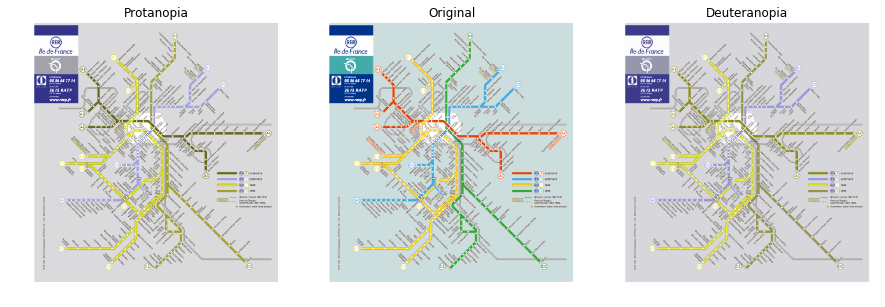

In [39]:
simulador(img)

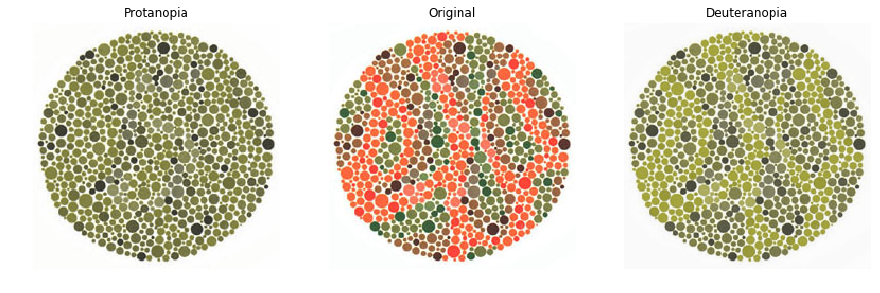

In [40]:
test01 = cv2.imread('test01.jpg')
simulador(test01)

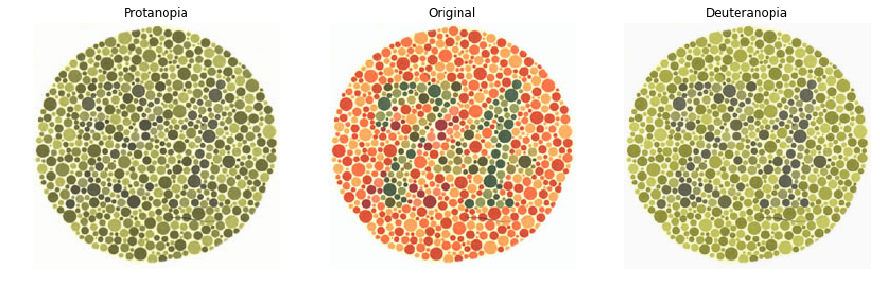

In [41]:
test02 = cv2.imread('test02.jpg')
simulador(test02)

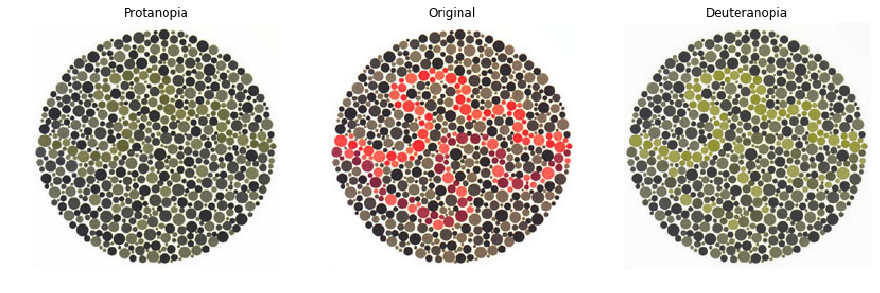

In [42]:
test03 = cv2.imread('test03.jpg')
simulador(test03)

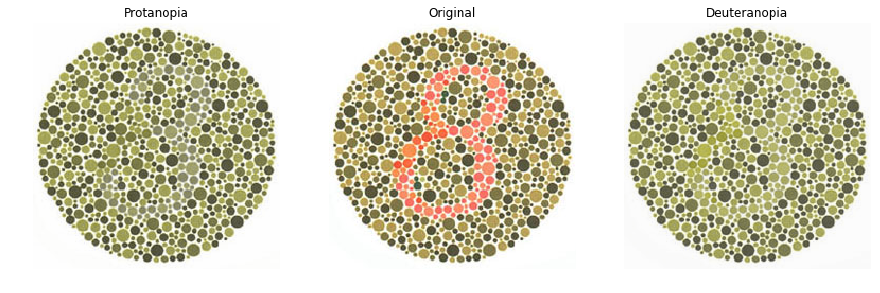

In [43]:
test04 = cv2.imread('test04.jpg')
simulador(test04)

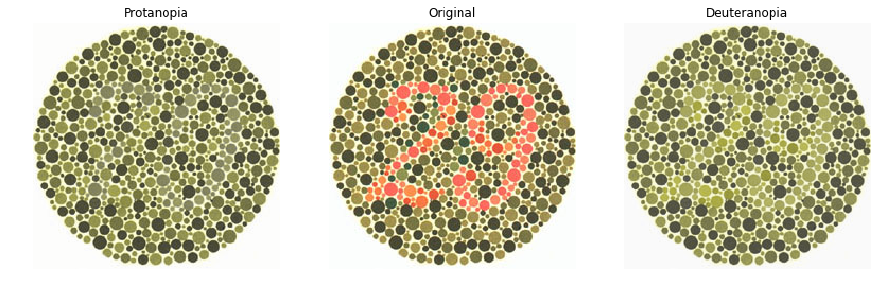

In [44]:
test05 = cv2.imread('test05.jpg')
simulador(test05)

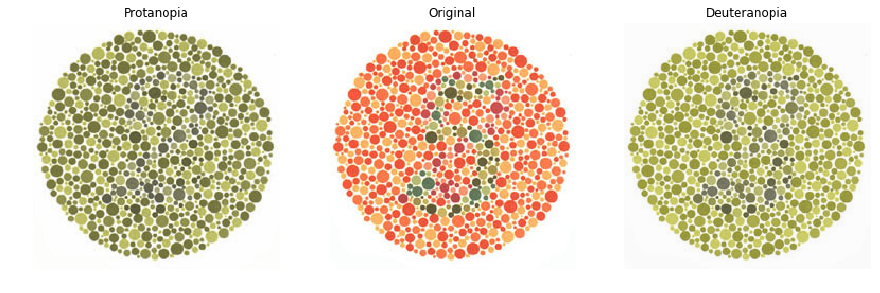

In [45]:
test06 = cv2.imread('test06.jpg')
simulador(test06)

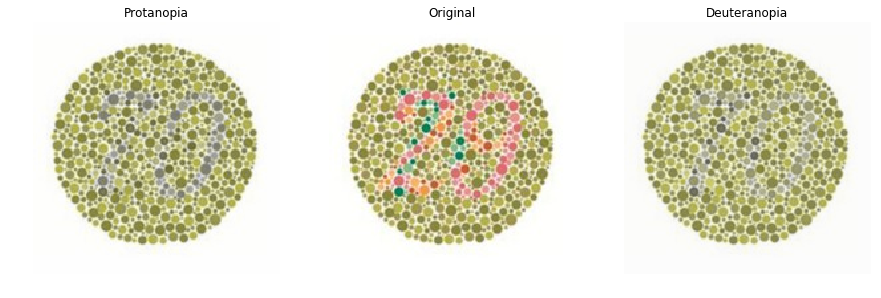

In [46]:
test07 = cv2.imread('test07.jpeg')
simulador(test07)

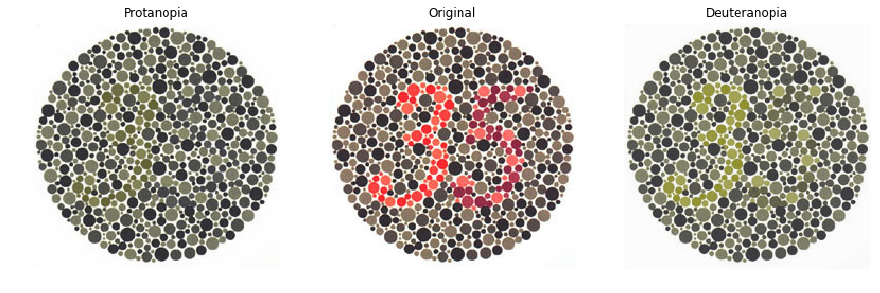

In [47]:
test08 = cv2.imread('test08.jpg')
simulador(test08)